In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('business.retailsales2.csv')
dataset

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [3]:
dataset.shape

(36, 9)

In [4]:
dataset.describe

<bound method NDFrame.describe of         Month  Year  Total Orders  Gross Sales  Discounts  Returns  Net Sales  \
0     January  2017            73      8861.50    -129.40  -448.45    8283.65   
1    February  2017            56      6908.50    -104.70  -416.20    6387.60   
2       March  2017            60      5778.50    -172.20 -1017.20    4589.10   
3       April  2017            70      8814.00    -281.40     0.00    8532.60   
4         May  2017            54      6677.00    -185.75  -253.80    6237.45   
5        June  2017            68      9621.50    -234.45   -17.50    9369.55   
6        July  2017            66      6480.00     -51.50  -469.20    5959.30   
7      August  2017            55      8025.00    -258.90   -26.00    7740.10   
8   September  2017            68      7075.00     -61.70  -281.00    6732.30   
9     October  2017            59      5720.00     -88.00  -305.00    5327.00   
10   November  2017            91     13025.00    -131.30  -323.85   12569.

In [5]:
x = dataset.iloc[:,2:8]
y = dataset["Total Sales"]
print(x)

    Total Orders  Gross Sales  Discounts  Returns  Net Sales  Shipping
0             73      8861.50    -129.40  -448.45    8283.65   1088.30
1             56      6908.50    -104.70  -416.20    6387.60    892.45
2             60      5778.50    -172.20 -1017.20    4589.10    707.43
3             70      8814.00    -281.40     0.00    8532.60   1068.30
4             54      6677.00    -185.75  -253.80    6237.45    866.46
5             68      9621.50    -234.45   -17.50    9369.55   1204.32
6             66      6480.00     -51.50  -469.20    5959.30    807.36
7             55      8025.00    -258.90   -26.00    7740.10    843.46
8             68      7075.00     -61.70  -281.00    6732.30    907.32
9             59      5720.00     -88.00  -305.00    5327.00    695.42
10            91     13025.00    -131.30  -323.85   12569.85   1555.10
11           116     10356.05    -149.85  -414.20    9792.00   1340.85
12            83      8923.00    -217.10   -26.25    8679.65   1180.18
13    

In [6]:
print(y)

0      9371.95
1      7280.05
2      5296.53
3      9600.90
4      7103.91
5     10573.87
6      6766.66
7      8583.56
8      7639.62
9      6022.42
10    14124.95
11    11132.85
12     9859.83
13     7158.61
14     8434.00
15    10521.63
16     7059.58
17    13543.36
18     9974.13
19     8764.81
20    11941.03
21     7704.25
22    13670.90
23    14936.15
24     7615.91
25     7318.15
26    13769.75
27     8024.05
28    11216.20
29     8327.13
30    10014.78
31    10278.21
32     9436.86
33     8911.53
34    27681.30
35    33306.46
Name: Total Sales, dtype: float64


In [7]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1)
print(x_train.shape)

(27, 6)


In [8]:
print(y_train.shape)

(27,)


In [9]:
print(x_test.shape)

(9, 6)


In [10]:
classifier = ElasticNet().fit(x_train,y_train)

In [11]:
classifier.intercept_

0.2568008998332516

In [12]:
#model coefficients 

classifier.coef_

array([-0.        ,  0.88063931,  0.88038436,  0.88031234,  0.11931004,
        1.00003606])

In [13]:
classifier.coef_.shape

(6,)

In [14]:
#printing the r - squared
#printint the r- squared for training data
('the r-squred for training data', classifier.score(x_train, y_train)*100)

('the r-squred for training data', 99.99999913451614)

In [15]:
('the r-squred for test data', classifier.score(x_test, y_test)*100)

('the r-squred for test data', 99.99999986572172)

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
#plotting the prediction error
from yellowbrick.regressor import PredictionError


C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


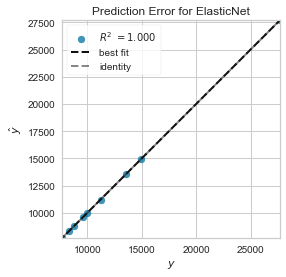

<AxesSubplot:title={'center':'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [18]:
visualizer = PredictionError(classifier)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()
                        

C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


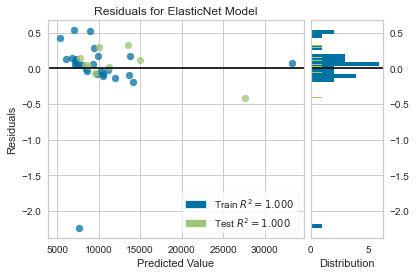

<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(classifier)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

In [20]:
#elastic net regression with several values of lambda
#setting the parameters
#Alphas
alphas = 10**np.linspace(10,100,10)*0.5
# Lambdas
i_min = 0.01
i_max = 0.2
i_num = 10

lambdas = np.linspace(i_min , i_max , i_num)
#prediction

pred_num = x.shape[1]

#coefficients

coef_a = np.zeros((i_num , pred_num))

#r squared
rsq_train = np.zeros(i_num)
rsq_test =  np.zeros(i_num)

#enumerating through lambdas with ind and i

for ind , i in enumerate(lambdas):
    classifier = ElasticNet(alpha = i).fit(x_train, y_train)
    coef_a[ind , :] = classifier.coef_
    rsq_train[ind] = classifier.score(x_train,y_train)
    rsq_test[ind] = classifier.score(x_test,y_test)


In [21]:
#plotting the r square as a function of lambda values
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_8936\4279970892.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_train ,"bo-", label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6 , linewidth = 4 )
C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_8936\4279970892.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_test ,"bo-", label = r'$R^2$ Training dataset', color = 'green', alpha = 0.6 , linewidth = 4 )


Text(0.5, 0, 'lambda')

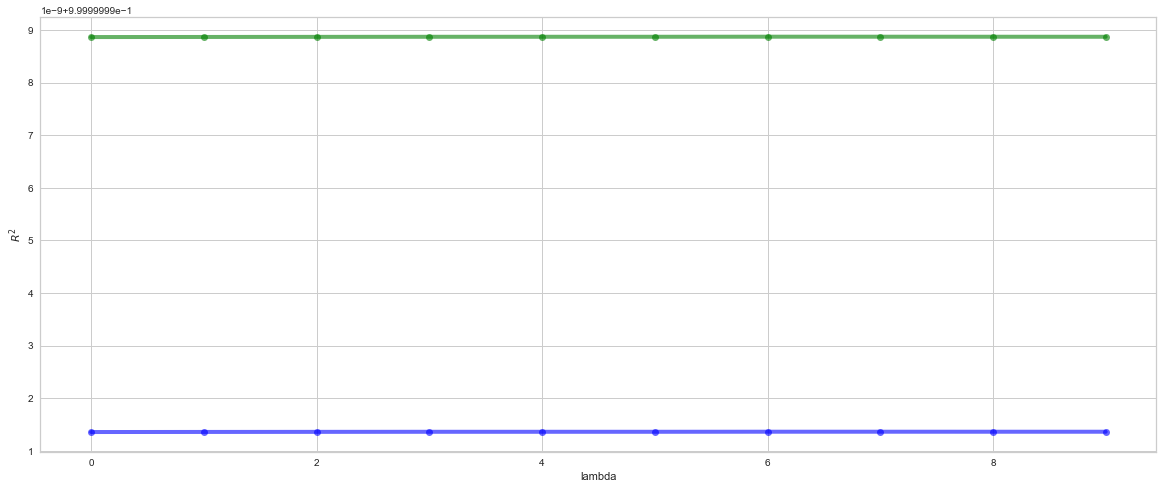

In [22]:
#plotting the r2

plt.figure(figsize = (20,8))
plt.plot(rsq_train ,"bo-", label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6 , linewidth = 4 )
plt.plot(rsq_test ,"bo-", label = r'$R^2$ Training dataset', color = 'green', alpha = 0.6 , linewidth = 4 )
plt.ylabel(r'$R^2$')
plt.xlabel("lambda")

In [23]:
#making prediction on testing data

y_pred = classifier.predict(x_test)
y_pred

array([10015.06783641, 27681.1104293 , 11216.219237  ,  9600.7977761 ,
        8764.88771407, 13543.73499602,  7704.39295684, 14936.35960421,
        8327.21422345])

In [24]:
#the r squared of the prediction


In [25]:
rsq_test = r2_score(y_test,y_pred)*100
rsq_test

99.99999988711164

In [26]:
from sklearn.metrics import mean_squared_error



In [27]:
#rmse on the testing data

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_test


0.1965627702913235

In [28]:
#the rmse on the training dataset
#predicting on the training data
y_predict_train = classifier.predict(x_train)


In [29]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_predict_train))
rmse_train


0.4743267887672644

In [30]:
#model tuning using elaticnetcv
from sklearn.linear_model import ElasticNetCV



In [31]:
#10 folds CV

Classifier_cv = ElasticNetCV(alphas = np.random.randint(0 ,100 ,10), cv = 10).fit(x_train,y_train)

In [32]:
#printing the scores

Classifier_cv.alphas

array([32, 46, 83, 19, 68, 60,  2, 66, 94, 80])

In [33]:
Classifier_cv

ElasticNetCV(alphas=array([32, 46, 83, 19, 68, 60,  2, 66, 94, 80]), cv=10)

In [34]:
Classifier_cv.alpha_

2

In [35]:
#creating a new model with optimum alpha
Classifier_tuned = ElasticNet().set_params(alpha = Classifier_cv.alpha_).fit(x_train,y_train)


In [36]:
y_pred_tune = Classifier_tuned.predict(x_test)

In [37]:
#computing the rmse

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tune))

In [38]:
rmse_tuned

0.29104568117457835

In [39]:
y_pred_tune_train = Classifier_tuned.predict(x_train)

In [40]:
rmse_tuned_train = np.sqrt(mean_squared_error(y_train, y_pred_tune_train))

In [41]:
rmse_tuned_train

0.4786774720465183